<a href="https://www.kaggle.com/code/mosesmoncy/sms-validation-nlp?scriptVersionId=126872353" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

SMS text verification lets websites, apps, banks, and social networks double-check the identity of a user. SMS verification goes by other names, too. You might hear it referred to as SMS authentication, SMS-based two-factor authentication (2FA), or SMS one-time password (OTP).
Still, mobile SMS verification isn't perfect. There are, admittedly, security risks (which we'll get into later) and costs to consider. But it's hard to beat for its ease and convenience. Plus, consumers have gotten used to this verification over the years, as it doesn't require any additional apps or services.

Here the model is created to predict whether the SMS message is a Spam or Non-Spam

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re  # regular expression ==> used to remove special characters

In [2]:
a=pd.read_csv('/kaggle/input/sms-train/SMS_train (1).csv',encoding='ISO-8859-1')
a

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [3]:
a1=pd.read_csv('/kaggle/input/sms-test/SMS_test (2).csv',encoding='ISO-8859-1')
a1

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [4]:
a2=pd.concat([a,a1],axis=0)
a2

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [5]:
a2.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [6]:
a2.tail()

,S. No.,Message_body,Label
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam
124,125,Great. Have a safe trip. Dont panic surrender ...,Non-Spam


In [7]:
a2.shape

(1082, 3)

In [8]:
a2.dtypes

S. No.           int64
Message_body    object
Label           object
dtype: object

In [9]:
a2.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

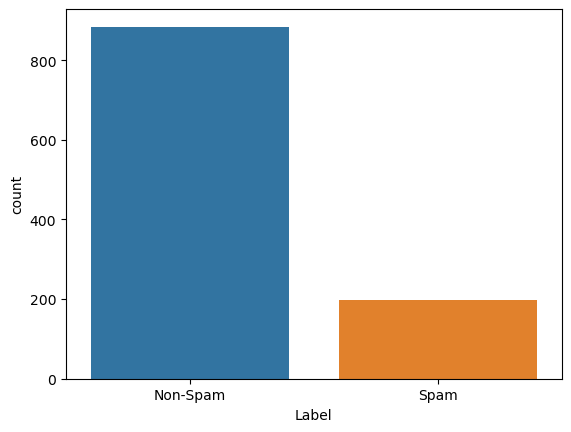

In [10]:
# plot a bar Chart for class

sns.countplot(x=a2['Label'])

In [11]:
a2.drop(['S. No.'],axis=1,inplace=True)
a2

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,Try to do something dear. You read something f...,Non-Spam
122,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [12]:
# replacing 'Non-Spam=1','Spam=-1'

a2['Label']=a2['Label'].map({'Non-Spam':1,'Spam':-1})
a2

,Message_body,Label
0,Rofl. Its true to its name,1
1,The guy did some bitching but I acted like i'd...,1
2,"Pity, * was in mood for that. So...any other s...",1
3,Will ü b going to esplanade fr home?,1
4,This is the 2nd time we have tried 2 contact u...,-1
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,1
121,Try to do something dear. You read something f...,1
122,Sun ah... Thk mayb can if dun have anythin on....,1
123,"SYMPTOMS when U are in love: ""1.U like listeni...",1


In [13]:
# preprocessing 'Message_body'

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [14]:
messages=a2['Message_body']
messages

0                             Rofl. Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity, * was in mood for that. So...any other s...
3                   Will ü b going to esplanade fr home?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear. You read something f...
122    Sun ah... Thk mayb can if dun have anythin on....
123    SYMPTOMS when U are in love: "1.U like listeni...
124    Great. Have a safe trip. Dont panic surrender ...
Name: Message_body, Length: 1082, dtype: object

In [15]:
# Preprocessing 

# tokenisation
from nltk.tokenize import TweetTokenizer
tokens=TweetTokenizer()
messages=messages.apply(lambda x:tokens.tokenize(x)).apply(lambda x:" ".join(x))  
messages

0                            Rofl . Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity , * was in mood for that . So ... any oth...
3                  Will ü b going to esplanade fr home ?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear . You read something ...
122    Sun ah ... Thk mayb can if dun have anythin on...
123    SYMPTOMS when U are in love : " 1 . U like lis...
124    Great . Have a safe trip . Dont panic surrende...
Name: Message_body, Length: 1082, dtype: object

In [16]:
# remove special characters
# we use re  ==> regular expression

messages=messages.str.replace('[^a-zA-Z-0-9]+',' ') 
messages

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


0                              Rofl Its true to its name
1      The guy did some bitching but I acted like i d...
2      Pity was in mood for that So any other suggest...
3                     Will b going to esplanade fr home 
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear You read something fo...
122    Sun ah Thk mayb can if dun have anythin on Thk...
123    SYMPTOMS when U are in love 1 U like listening...
124     Great Have a safe trip Dont panic surrender all 
Name: Message_body, Length: 1082, dtype: object

In [17]:
# Stemming

from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
messages=messages.apply(lambda x:[stemmer.stem(i.lower()) for i in tokens.tokenize(x)]).apply(lambda x:' '.join(x))
messages

0                                rofl it true to it name
1      the guy did some bitch but i act like i d be i...
2         piti was in mood for that so ani other suggest
3                          will b go to esplanad fr home
4      this is the 2nd time we have tri 2 contact u u...
                             ...                        
120    7 wonder in my world 7th you 6th ur style 5th ...
121       tri to do someth dear you read someth for exam
122    sun ah thk mayb can if dun have anythin on thk...
123    symptom when u are in love 1 u like listen son...
124        great have a safe trip dont panic surrend all
Name: Message_body, Length: 1082, dtype: object

In [18]:
# remove stop words

from nltk.corpus import stopwords
sw=stopwords.words('english')
messages=messages.apply(lambda x:[i for i in tokens.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
messages

0                                         rofl true name
1      guy bitch act like interest buy someth els nex...
2                                  piti mood ani suggest
3                                  b go esplanad fr home
4      2nd time tri 2 contact u u 750 pound prize 2 c...
                             ...                        
120    7 wonder world 7th 6th ur style 5th ur smile 4...
121                     tri someth dear read someth exam
122    sun ah thk mayb dun anythin thk book e lesson ...
123    symptom u love 1 u like listen song 2 u get st...
124                   great safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

In [19]:
# vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
x=vector.fit_transform(messages)
print(x)

  (0, 1852)	0.5086856793431559
  (0, 2734)	0.5352804139572925
  (0, 2264)	0.6743246681420617
  (1, 1191)	0.19084717659108363
  (1, 2794)	0.2620897628588603
  (1, 1236)	0.3166286972359124
  (1, 2881)	0.22002695063463382
  (1, 1882)	0.25587622919424974
  (1, 1035)	0.29329608266677626
  (1, 2455)	0.26551480891862445
  (1, 677)	0.26551480891862445
  (1, 1478)	0.307577621142851
  (1, 1626)	0.20980773882403927
  (1, 396)	0.3419878575694143
  (1, 607)	0.36211655551990307
  (1, 1309)	0.2588858462402129
  (2, 2555)	0.5165656915002457
  (2, 463)	0.36716239650585775
  (2, 1805)	0.5469696796701571
  (2, 2044)	0.5469696796701571
  (3, 1386)	0.3883344606933877
  (3, 1187)	0.630740525885995
  (3, 1063)	0.5956800313099777
  (3, 1265)	0.3106896135077221
  (4, 1858)	0.30932958639486785
  :	:
  (1079, 1822)	0.2633677871797729
  (1079, 2560)	0.2544650331411059
  (1079, 1614)	0.2410408066920934
  (1079, 628)	0.23101411970886698
  (1079, 2654)	0.4820816133841868
  (1079, 1737)	0.21063371947658105
  (1079, 1

In [20]:
y=a2['Label'].values  
y

array([1, 1, 1, ..., 1, 1, 1])

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

x_train

<757x3005 sparse matrix of type '<class 'numpy.float64'>'
	with 6779 stored elements in Compressed Sparse Row format>

In [22]:
y_train

array([ 1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
       -1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1, -1,  1,  1,  1

<AxesSubplot:ylabel='Label'>

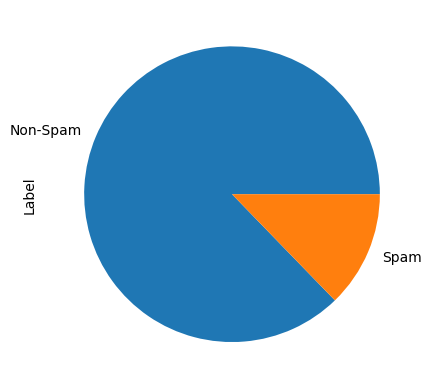

In [23]:
# plot a bar Chart for class

a['Label'].value_counts().plot(kind='pie')

In [24]:
# Here we implement 5 classification models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model1=KNeighborsClassifier(n_neighbors=9,weights='uniform')
model2=MultinomialNB()
model3=SVC()
model4=DecisionTreeClassifier(criterion='entropy')
model5=RandomForestClassifier(n_estimators=100)

modellist=[model1,model2,model3,model4,model5]

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

for i in modellist:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print('the classification details of model',i,'is below')
    print('the confusion matrix of ',i,'is')
    print( confusion_matrix(y_test,y_pred))
    print('accuracy score of',i,'is')
    print(accuracy_score(y_test,y_pred))
    print('the classification report of',i,'is')
    print(classification_report(y_test,y_pred))

the classification details of model KNeighborsClassifier(n_neighbors=9) is below
the confusion matrix of  KNeighborsClassifier(n_neighbors=9) is
[[ 31  25]
 [  1 268]]
accuracy score of KNeighborsClassifier(n_neighbors=9) is
0.92
the classification report of KNeighborsClassifier(n_neighbors=9) is
              precision    recall  f1-score   support

          -1       0.97      0.55      0.70        56
           1       0.91      1.00      0.95       269

    accuracy                           0.92       325
   macro avg       0.94      0.77      0.83       325
weighted avg       0.92      0.92      0.91       325

the classification details of model MultinomialNB() is below
the confusion matrix of  MultinomialNB() is
[[ 36  20]
 [  0 269]]
accuracy score of MultinomialNB() is
0.9384615384615385
the classification report of MultinomialNB() is
              precision    recall  f1-score   support

          -1       1.00      0.64      0.78        56
           1       0.93      1.00 